In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [19]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape

housing_trimmed = pd.read_csv('data/houseprice_trimmed.csv')
housing_trimmed.shape

(2464, 80)

In [57]:
housing.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,856,30,58.800593,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal,126000
1,1049,120,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,139500
2,1001,30,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal,124900
3,1039,70,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal,114000
4,1665,60,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,227000


In [4]:
price = housing['SalePrice']
features = housing.drop(["SalePrice"], axis=1)

In [5]:
features.shape

(2580, 79)

In [ ]:
# SKIP THIS PART - KEEP ALL FEATURES

In [4]:
# find variables with low variation (highly imbalanced distributions)
for col in features.columns:
    value_counts = features[col].value_counts(normalize=True)
    highest_freq = value_counts.max()
    if highest_freq > 0.95:
        print(f"Column {col} has highest frequency of {highest_freq:.2%}")

Column LowQualFinSF has highest frequency of 98.72%
Column KitchenAbvGr has highest frequency of 95.85%
Column 3SsnPorch has highest frequency of 98.84%
Column PoolArea has highest frequency of 99.65%
Column MiscVal has highest frequency of 96.32%
Column Street has highest frequency of 99.61%
Column Utilities has highest frequency of 99.92%
Column LandSlope has highest frequency of 95.27%
Column Condition2 has highest frequency of 99.03%
Column RoofMatl has highest frequency of 98.60%
Column Heating has highest frequency of 98.45%
Column PoolQC has highest frequency of 99.65%
Column MiscFeature has highest frequency of 96.24%


In [32]:
high_freq_vars = ['LowQualFinSF', 
                  'KitchenAbvGr',
                  '3SsnPorch',
                  'PoolArea',
                  'MiscVal',
                  'Street',
                  'Utilities',
                  'LandSlope',
                  'Condition2',
                  'RoofMatl',
                  'Heating',
                  'PoolQC',
                  'MiscFeature'
                ]

In [6]:
# define the independent and dependent variables
X = features[high_freq_vars]
y = price

# create dummy variables for categorical columns
X = pd.get_dummies(X)

# add a constant to the independent variables
X = sm.add_constant(X)

# fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     7.098
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           3.92e-32
Time:                        09:39:26   Log-Likelihood:                -32502.
No. Observations:                2580   AIC:                         6.508e+04
Df Residuals:                    2544   BIC:                         6.529e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.521e+04   4.18e+0

In [33]:
# features to drop:
# 3SsnPorch, PoolArea, MiscVal, MiscFeature (no significant relationship; p-value > 0.05)

features.drop(['3SsnPorch', 'PoolArea', 'MiscVal', 'MiscFeature'], axis=1, inplace = True)

In [34]:
features.shape

(2580, 75)

In [6]:
# check if there are any categorical features with too many unique values
# none are above 20 except neighborhood, so remove none
features.select_dtypes(include=['object']).nunique()

MSZoning          7
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     28
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          6
BsmtCond          6
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       5
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            5
Fence             5
MiscFeature       5
SaleType         10
SaleCondition     6
dtype: int64

In [ ]:
# create binary variables for remodel, garagecars, pool, porch

# add total SF, % of lot area (proxy for yard)

<Axes: >

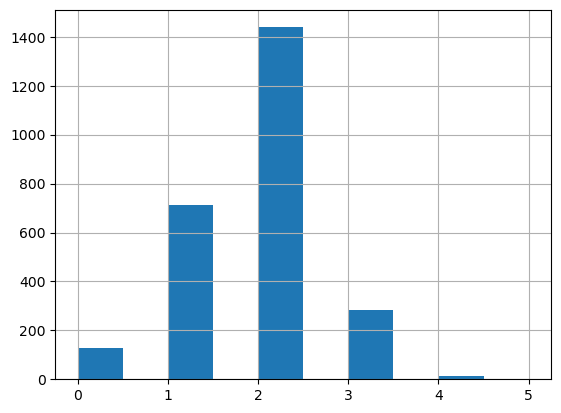

In [20]:
features['GarageCars'].hist()

In [35]:
features['GarageSize'] = np.where(features['GarageCars'] < 2, 'small', 'large')
features['GarageSize'].value_counts()

large    1739
small     841
Name: GarageSize, dtype: int64

<Axes: >

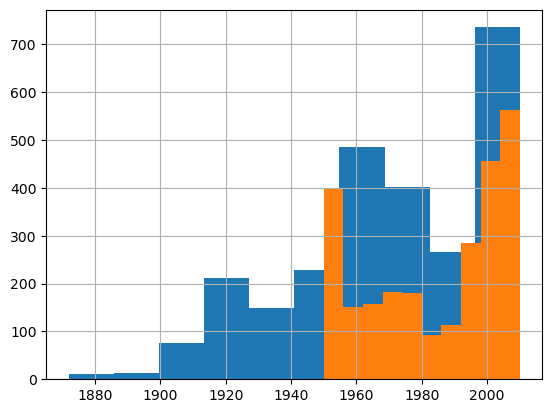

In [36]:
features['YearBuilt'].hist()
features['YearRemodAdd'].hist()

In [37]:
features['Remodel_binary'] = np.where(features['YearRemodAdd'] == features['YearBuilt'], 0, 1)
features['Remodel_binary'].value_counts()

0    1386
1    1194
Name: Remodel_binary, dtype: int64

In [ ]:
# outdoor space
features['WoodDeckSF'].describe()
features['OpenPorchSF'].describe()
features['EnclosedPorch'].describe()
features['3SsnPorch'].describe()
features['ScreenPorch'].describe()

In [11]:
features['Porch_bool'] = np.where([features['WoodDeckSF'] > 0 or 
                                   features['OpenPorchSF'] > 0 or
                                   features['EnclosedPorch'] > 0 or
                                   features['3SsnPorch'] > 0 or
                                   features['ScreenPorch'] > 0], 1, 0)

#odd_numbers = [num for num in num_range if num % 2 == 1]
#sqr_nums = map(lambda num: num**2, num_range)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [7]:
# indoor space
features.filter(regex='Porch')

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,0,0,0,166
1,105,0,0,0
2,0,42,86,0
3,0,168,0,111
4,45,0,0,0
...,...,...,...,...
2575,98,0,0,40
2576,0,0,0,0
2577,0,0,0,0
2578,96,0,0,0


In [22]:
# indoor space
features.filter(regex='SF')

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF
0,238.0,0.0,618.0,856.0,856,0,0,0,0
1,552.0,393.0,104.0,1049.0,1049,0,0,0,105
2,737.0,0.0,100.0,837.0,1001,0,0,154,0
3,0.0,0.0,405.0,405.0,717,322,0,0,0
4,643.0,0.0,167.0,810.0,810,855,0,0,45
...,...,...,...,...,...,...,...,...,...
2575,0.0,0.0,952.0,952.0,952,0,0,0,98
2576,0.0,0.0,0.0,0.0,1733,0,0,0,0
2577,284.0,0.0,717.0,1001.0,1001,1001,0,0,0
2578,841.0,0.0,144.0,985.0,985,857,0,193,96


In [38]:
# for most homes, total ground living area is sum of 1st + 2nd floor
# if home has low quality finished sq ft, this is included in living area

features['TotalIndoorSF'] = features['TotalBsmtSF'] + features['GrLivArea']

<Axes: >

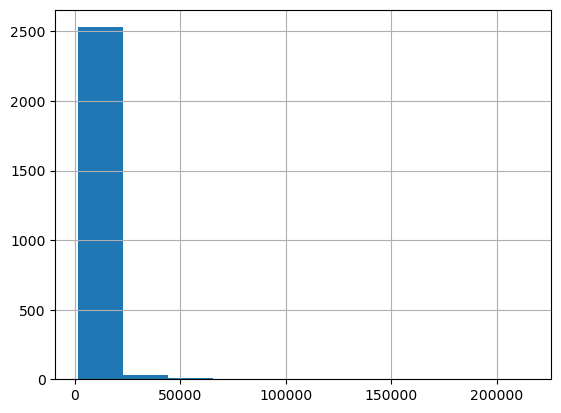

In [12]:
features['LotArea'].hist()

<Axes: >

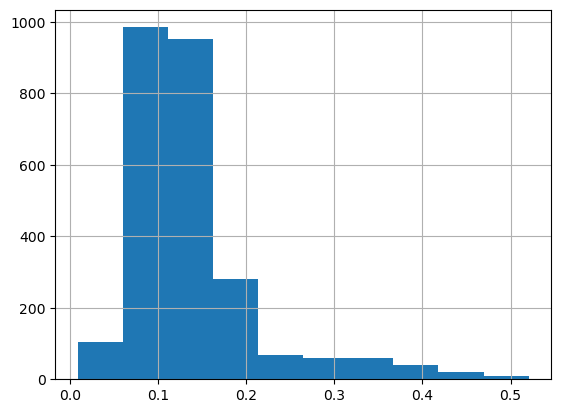

In [14]:
features['LotPercent'] = features['1stFlrSF'] / features['LotArea']
features['LotPercent'].hist()

In [15]:
features.shape

(2580, 80)

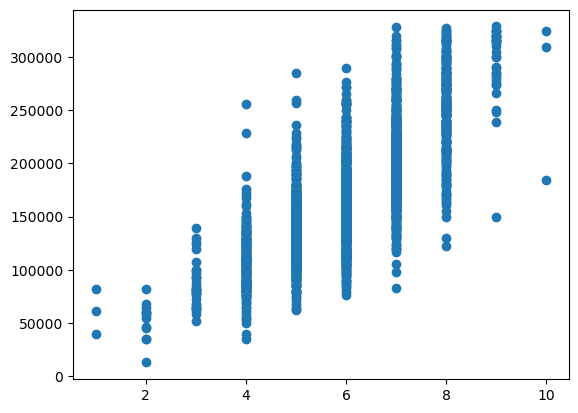

In [20]:
plt.scatter(housing_trimmed['OverallQual'], housing_trimmed['SalePrice'])

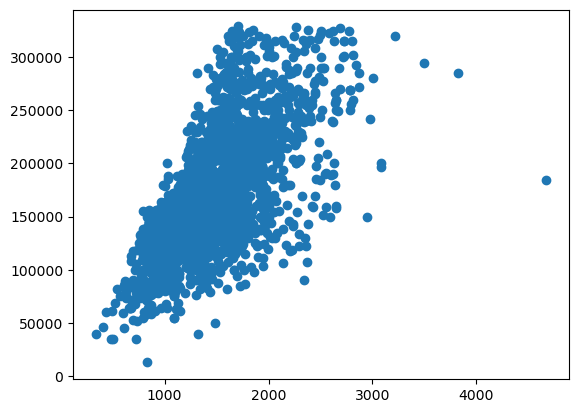

In [22]:
plt.scatter(housing_trimmed['GrLivArea'], housing_trimmed['SalePrice'])

In [29]:
features['LivArea_sq'] = features['GrLivArea']**2
features['Log_LivArea'] = np.log(features['GrLivArea'])

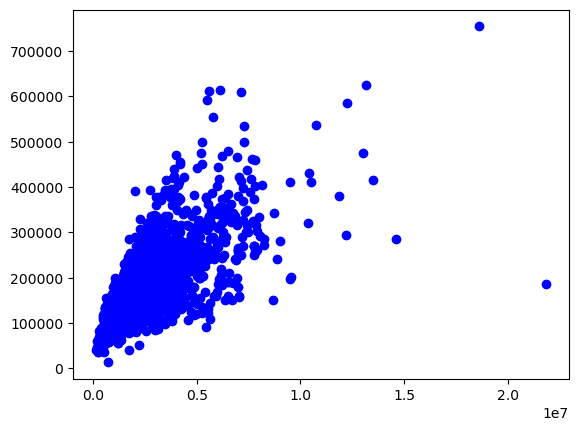

In [42]:
plt.scatter(features['LivArea_sq'], price, c = 'blue')
#plt.scatter(features['GrLivArea'], price, c = 'green')
#plt.scatter(features['Log_LivArea'], price, c = 'orange')

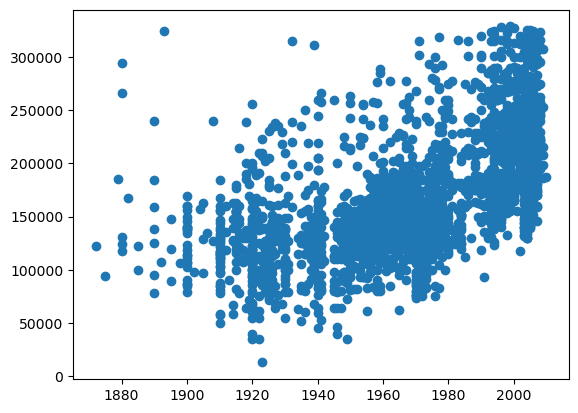

In [23]:
plt.scatter(housing_trimmed['YearBuilt'], housing_trimmed['SalePrice'])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create some data
x1 = [1, 2, 3, 4, 5]
x2 = [2, 4, 6, 8, 10]
y = [3, 6, 9, 12, 15]

# Create interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(np.array([x1, x2]).T)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(model.coef_)

In [16]:
housing_newfeat = pd.concat([features, price], axis = 1)

In [17]:
# export as csv
housing_newfeat.to_csv('data/houseprice_newfeat.csv', index=False)